<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Optiver_Volitality_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggel download dataset

https://adityashrm21.github.io/Setting-Up-Kaggle/

https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab

https://medium.com/analytics-vidhya/fetch-data-from-kaggle-with-python-9154a4c610e3

In [1]:
pip install kaggle

In [6]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
mv /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [10]:
api.competitions_list(category='gettingStarted')

[contradictory-my-dear-watson,
 gan-getting-started,
 tpu-getting-started,
 digit-recognizer,
 titanic,
 house-prices-advanced-regression-techniques,
 connectx,
 nlp-getting-started,
 facial-keypoints-detection,
 street-view-getting-started-with-julia,
 word2vec-nlp-tutorial,
 data-science-london-scikit-learn,
 just-the-basics-the-after-party,
 just-the-basics-strata-2013]

In [11]:
!kaggle competitions download -c optiver-realized-volatility-prediction

  0% 0.00/3.88k [00:00<?, ?B/s]
100% 3.88k/3.88k [00:00<00:00, 7.78MB/s]
  0% 0.00/6.94k [00:00<?, ?B/s]
100% 6.94k/6.94k [00:00<00:00, 6.98MB/s]
  0% 0.00/969k [00:00<?, ?B/s]
100% 969k/969k [00:00<00:00, 62.9MB/s]
  0% 0.00/1.31M [00:00<?, ?B/s]
100% 1.31M/1.31M [00:00<00:00, 21.6MB/s]
  0% 0.00/1.73M [00:00<?, ?B/s]
100% 1.73M/1.73M [00:00<00:00, 117MB/s]
  0% 0.00/2.85M [00:00<?, ?B/s]
100% 2.85M/2.85M [00:00<00:00, 93.5MB/s]
  0% 0.00/842k [00:00<?, ?B/s]
100% 842k/842k [00:00<00:00, 74.5MB/s]
  0% 0.00/1.26M [00:00<?, ?B/s]
100% 1.26M/1.26M [00:00<00:00, 166MB/s]
  0% 0.00/2.03M [00:00<?, ?B/s]
100% 2.03M/2.03M [00:00<00:00, 137MB/s]
  0% 0.00/907k [00:00<?, ?B/s]
100% 907k/907k [00:00<00:00, 119MB/s]
  0% 0.00/1.51M [00:00<?, ?B/s]
100% 1.51M/1.51M [00:00<00:00, 101MB/s]
  0% 0.00/1.72M [00:00<?, ?B/s]
100% 1.72M/1.72M [00:00<00:00, 115MB/s]
  0% 0.00/689k [00:00<?, ?B/s]
100% 689k/689k [00:00<00:00, 92.2MB/s]
  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 127MB/

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import zipfile

In [14]:
zf = zipfile.ZipFile('/content/c439ef22282f412ba39e9137a3fdabac.parquet.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [15]:
book = pd.read_parquet('/content/c439ef22282f412ba39e9137a3fdabac.parquet')

In [16]:
book.head(5)

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


In [17]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

def calc_stats(df):
    df['size_spread_l1'] = df['ask_size1'] - df['bid_size1']
    df['size_spread_l2'] = df['ask_size2'] - df['bid_size2']
    
    df['price_spread_l1'] = df['ask_price1'] - df['bid_price1']
    df['price_spread_l2'] = df['ask_price2'] - df['bid_price2']
    
    df['wap'] = (df['bid_price1'] * df['ask_size1'] + df['ask_price1'] * df['bid_size1']) / (df['bid_size1']+ df['ask_size1'])
    
    df.loc[:,'log_return'] = log_return(df['wap'])
    df = df[~df['log_return'].isnull()]
    
    # This is wrong
    df['realized_vol'] = realized_volatility(df['log_return'])
    
    return df

In [18]:
book = calc_stats(book)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
book.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,size_spread_l1,size_spread_l2,price_spread_l1,price_spread_l2,wap,log_return,realized_vol
count,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,917552.000000,9.175520e+05,917552.000000
mean,15980.074318,293.692335,0.999904,1.000137,0.999864,1.000177,113.717223,100.825213,86.770333,83.203049,-12.892009,-3.567284,0.001031,0.001429,1.000027,-3.178264e-09,0.471090
std,9381.769206,173.596264,0.003668,0.003696,0.003702,0.003743,108.657206,109.063873,90.602595,94.968438,153.548643,131.420647,0.001068,0.001297,0.003665,4.971973e-04,0.005346
min,5.000000,0.000000,0.938241,0.944337,0.937213,0.944456,1.000000,1.000000,1.000000,1.000000,-3214.000000,-4361.000000,0.000046,0.000140,0.939348,-3.974101e-02,0.476428
25%,7759.000000,142.000000,0.998368,0.999223,0.998184,0.999390,22.000000,14.000000,18.000000,14.000000,-96.000000,-80.000000,0.000485,0.000769,0.998802,-4.088235e-05,0.476428
50%,15772.000000,292.000000,0.999632,1.000331,0.999472,1.000496,100.000000,93.000000,100.000000,90.000000,0.000000,0.000000,0.000740,0.001094,1.000003,0.000000e+00,0.476428
75%,23834.000000,444.000000,1.000753,1.001560,1.000587,1.001745,157.000000,117.000000,102.000000,102.000000,80.000000,75.000000,0.001190,0.001633,1.001199,4.252074e-05,0.476428
max,32767.000000,599.000000,1.045641,1.056892,1.043756,1.057676,3221.000000,16608.000000,4391.000000,16608.000000,16607.000000,16605.000000,0.030309,0.063818,1.053275,5.925387e-02,0.476428


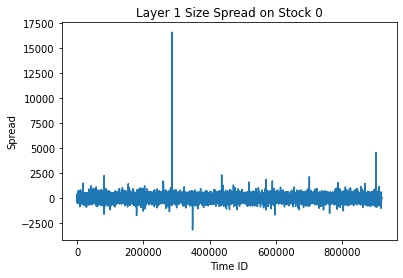

In [20]:
plt.plot(book['size_spread_l1'])
plt.title('Layer 1 Size Spread on Stock 0')
plt.xlabel('Time ID')
plt.ylabel('Spread')
plt.show()

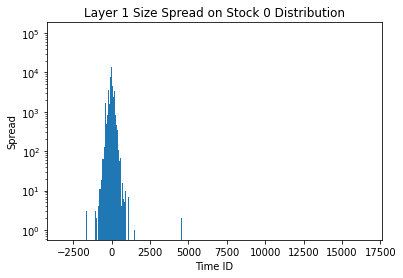

In [21]:
plt.hist(book['size_spread_l1'], bins='auto')
plt.title('Layer 1 Size Spread on Stock 0 Distribution')
plt.yscale('log')
plt.xlabel('Time ID')
plt.ylabel('Spread')
plt.show()

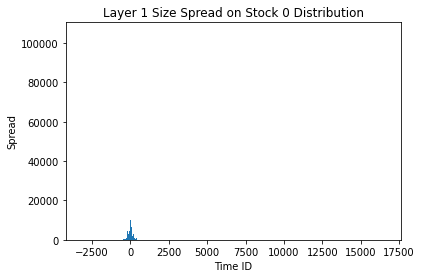

In [22]:
plt.hist(book['size_spread_l1'], bins='auto')
plt.title('Layer 1 Size Spread on Stock 0 Distribution')
plt.xlabel('Time ID')
plt.ylabel('Spread')
plt.show()

In [23]:
book['size_spread_l1'].describe()

count    917552.000000
mean        -12.892009
std         153.548643
min       -3214.000000
25%         -96.000000
50%           0.000000
75%          80.000000
max       16607.000000
Name: size_spread_l1, dtype: float64

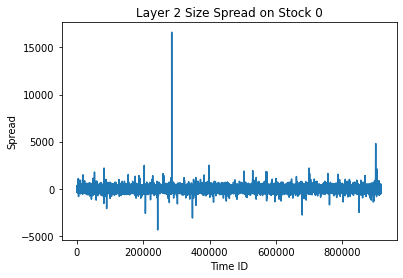

In [24]:
plt.plot(book['size_spread_l2'])
plt.title('Layer 2 Size Spread on Stock 0')
plt.xlabel('Time ID')
plt.ylabel('Spread')
plt.show()

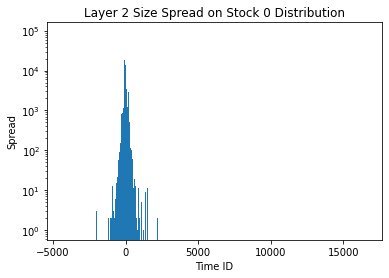

In [25]:
plt.hist(book['size_spread_l2'], bins='auto')
plt.title('Layer 2 Size Spread on Stock 0 Distribution')
plt.yscale('log')
plt.xlabel('Time ID')
plt.ylabel('Spread')
plt.show()

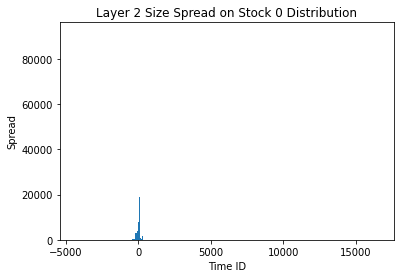

In [26]:
plt.hist(book['size_spread_l2'], bins='auto')
plt.title('Layer 2 Size Spread on Stock 0 Distribution')
plt.xlabel('Time ID')
plt.ylabel('Spread')
plt.show()

In [27]:
book['size_spread_l2'].describe()

count    917552.000000
mean         -3.567284
std         131.420647
min       -4361.000000
25%         -80.000000
50%           0.000000
75%          75.000000
max       16605.000000
Name: size_spread_l2, dtype: float64

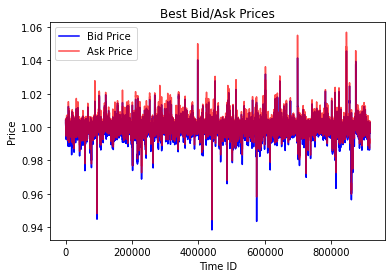

In [28]:
plt.plot(book['bid_price1'], c='b', label='Bid Price')
plt.plot(book['ask_price1'], c='r', label='Ask Price', alpha=0.7)
plt.title('Best Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()
plt.show()

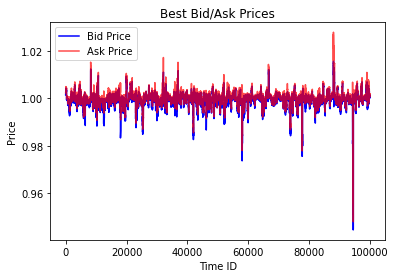

In [29]:
plt.plot(book[:100000]['bid_price1'], c='b', label='Bid Price')
plt.plot(book[:100000]['ask_price1'], c='r', label='Ask Price', alpha=0.7)
plt.title('Best Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()
plt.show()

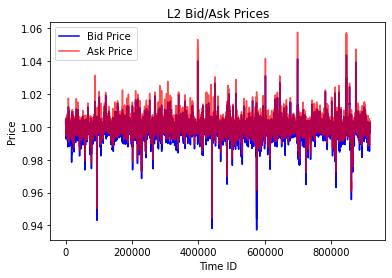

In [30]:
plt.plot(book['bid_price2'], c='b', label='Bid Price')
plt.plot(book['ask_price2'], c='r', label='Ask Price', alpha=0.7)
plt.title('L2 Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()
plt.show()

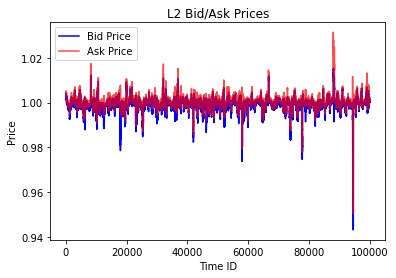

In [31]:
plt.plot(book[:100000]['bid_price2'], c='b', label='Bid Price')
plt.plot(book[:100000]['ask_price2'], c='r', label='Ask Price', alpha=0.7)
plt.title('L2 Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()
plt.show()

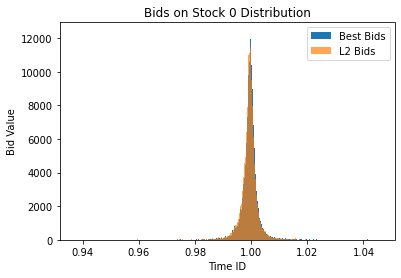

In [32]:
plt.hist(book['bid_price1'], bins='auto', label='Best Bids')
plt.hist(book['bid_price2'], bins='auto', label='L2 Bids', alpha=0.7)
plt.title('Bids on Stock 0 Distribution')
plt.xlabel('Time ID')
plt.ylabel('Bid Value')
plt.legend()
plt.show()

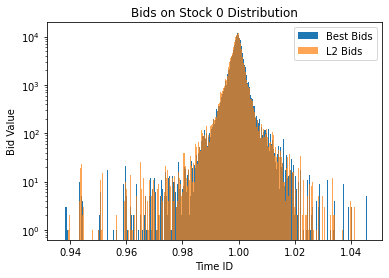

In [33]:
plt.hist(book['bid_price1'], bins='auto', label='Best Bids')
plt.hist(book['bid_price2'], bins='auto', label='L2 Bids', alpha=0.7)
plt.title('Bids on Stock 0 Distribution')
plt.xlabel('Time ID')
plt.ylabel('Bid Value')
plt.yscale('log')
plt.legend()
plt.show()

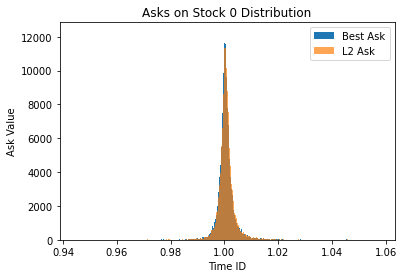

In [34]:
plt.hist(book['ask_price1'], bins='auto', label='Best Ask')
plt.hist(book['ask_price2'], bins='auto', label='L2 Ask', alpha=0.7)
plt.title('Asks on Stock 0 Distribution')
plt.xlabel('Time ID')
plt.ylabel('Ask Value')
plt.legend()
plt.show()

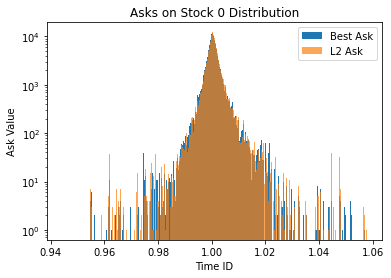

In [35]:
plt.hist(book['ask_price1'], bins='auto', label='Best Ask')
plt.hist(book['ask_price2'], bins='auto', label='L2 Ask', alpha=0.7)
plt.title('Asks on Stock 0 Distribution')
plt.xlabel('Time ID')
plt.ylabel('Ask Value')
plt.yscale('log')
plt.legend()
plt.show()

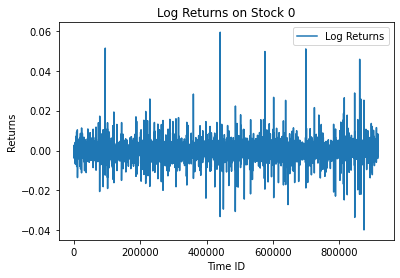

In [36]:
plt.plot(book['log_return'], label='Log Returns')
plt.title('Log Returns on Stock 0')
plt.xlabel('Time ID')
plt.ylabel('Returns')
plt.legend()
plt.show()